# **Introduction to the dataset**

In this notebook, the challenge of process and increase the text data for a sentiment analysis task is addressed. We are going to use PyTorch as a deep learning framework, and the Hugging Face ecosystem to manage the dataset and all the requirements related to DistilBERT, which is the transformer-encoder model that we'll use for the fine-tuning phase.<br>
First of all, we are going to introduce the dataset in which the augmentation process will be applied. This dataset is called [emotions](https://huggingface.co/datasets/dair-ai/emotion) and corresponds to the sentiments encoded in English Twitter messages, so each of the tweets is labeled with a corresponding sentiment or emotion. For this particular dataset, there are 6 types of emotions:<br>
1. Sadnees <br>
2. Joy<br>
3. Love <br>
4. Anger <br>
5. Fear <br>
6. Surprise <br>

In this project, we are going to process the emotions dataset and convert it into a binary classification dataset, as the observations from classes *Joy* and *Love* will be combined into a class called *Positive* and the instances from classes *Sadnees*, *Anger* and *Fear* will be joined to generate a class called *Negative*, so at the end, we will be working with two types of emotions: *Positive* and *Negative*.
<br>
Next, we are going to download the emotion dataset from the Hugging Face Hub.



In [1]:
# install datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 763.8 kB/s eta 0:00:00


In [2]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

We can display the information of the **emotions** object:

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

We can focus in any of the data splits, for example, let's check the train split:

In [4]:
train_data = emotions["train"]
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
print(train_data[:10])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'i feel as confused about life as a teenager or as jaded as a year old man', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'i feel romantic too'], 'label': [0, 0, 3, 2, 3, 0, 5, 4, 1, 2]}


In [6]:
print(train_data["text"][:10])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'i feel as confused about life as a teenager or as jaded as a year old man', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'i feel romantic too']


Next, we are going to deep dive into the properties of the emotions dataset. To achieve this, we are going to leverage the Pandas library to convert our Dataset object into a Dataframe and take advantage of the data visualization aids that Pandas offers. <br>


The function *label_int2str* will be useful to generate a new column in our dataset that contains the name of the label.

In [7]:
def label_int2str(row, split):
    return emotions[split].features["label"].int2str(row)

First, we are going to check the text distribution in the training set.

In [8]:
import pandas as pd

emotions.set_format(type="pandas")
df_train = emotions["train"][:]

We need to apply the label_int2str() function, which will integrate a new column called "label name" into df_train. This new column will keep the name of each of the labels and will be useful to check the distribution of the six classes.

In [9]:
df_train["label_name"] = df_train["label"].apply(label_int2str, split="train")
df_train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


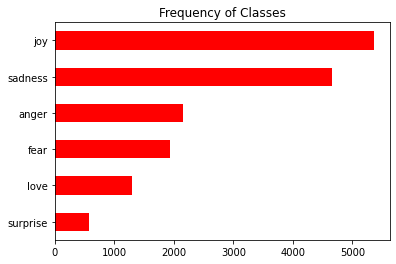

In [10]:
import matplotlib.pyplot as plt

df_train["label_name"].value_counts(ascending=True).plot.barh(color="red")
plt.title("Frequency of Classes")
plt.show()

In [11]:
df_train["label_name"].value_counts(ascending=True)

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

# **Combine the emotion labels into positive and negative**

As we previously stated, the emotions dataset will be processed to create a dataset with two generic types of emotion: *Positive* and *Negative*. For the positive class, we are going to combine the observations with labels *joy* and *love* from the emotions datasets, and for the negative class, the instances with labels *sadness*, *anger* and *fear* will be joined. The observations associated to the class surprise won't be taking into account, as it's not very clear if the surprise could be positive or negative, besides, the surprise class is the least representative in the emotions datasets, with only 572 instances, so for simplicity, it will be skipped.<br>
In the next cell, the combine_labels() function will be helpful to create the new dataset with classes Positive and Negative.

In [12]:
def combine_labels(dataset, label_names):
  sentences = []
  labels = []
  label_names1 = []
  for sentence, label_id, label_name in zip(dataset["text"], dataset["label"], label_names):
    if label_name == "joy" or label_name == "love":
      sentences.append(sentence)
      labels.append(1)
      label_names1.append("positive")
    elif label_name == "sadness" or label_name == "anger" or label_name == "fear":
      sentences.append(sentence)
      labels.append(0)
      label_names1.append("negative")
  
  return {'text':sentences, 'label':labels, 'label_name':label_names1}

**Training set**

First, we are going to create the binary training set based on the combine_labels() function. To proceed with this, it is necessary to convert the label_name feature from df_train into a Python list.

In [13]:
train_label_names =df_train.label_name.to_list()

In [14]:
train_label_names[:10]

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love']

Let's reset the format of the emotions Dataframe and convert it back to a Dataset object from Hugging Face.

In [15]:
emotions.reset_format()

We will apply the combine_labels() function to the train split of the emotions dataset. It is important to notice that the combine_labels() requires as an input argument a list with the name of the labels from the corresponding dataset, in this case, we are passing as an argument the name of the training labels.



In [16]:
emotions_train_binary=emotions["train"].map(combine_labels, batched=True, batch_size=None, fn_kwargs={"label_names": train_label_names})

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Now that the binary training set has been created, it is important to specify that the names of the labels are "negative" and "positive", leaving aside the name labels associated with the original emotions dataset (joy, love, surprise, sadness, anger and fear). This process is performed in the following cell.

In [17]:
from datasets import ClassLabel
emotions_train_binary.features["label"] = ClassLabel(names=["negative", "positive"])

In [18]:
emotions_train_binary.features["label"].names

['negative', 'positive']

In [19]:
emotions_train_binary[:10]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too',
  'i feel like i have to make the suffering i m seeing mean something'],
 'label': [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
 'label_name': ['negative',
  'negative',
  'negative',
  'positive',
  'negative',
  'negative',
  'negative',
  'positive',
  'positive',
  'negative']}

In the following cell, you can see how the labels of the new binary training dataset correspond to only two values: positive and negative.


In [20]:
set(emotions_train_binary["label_name"])

{'negative', 'positive'}

The distribution of the examples in the emotions_train_binary is shown next:

In [21]:
df_train_label_name = pd.DataFrame(emotions_train_binary["label_name"])

In [22]:
df_train_label_name.value_counts(ascending=True)

positive    6666
negative    8762
dtype: int64

Next, the same process to obtain a binary training set with classes positive and negative will be applied to the validation and test splits.

**Validation set**

In [23]:
#import pandas as pd

emotions.set_format(type="pandas")
df_validation = emotions["validation"][:]

In [24]:
df_validation["label_name"] = df_validation["label"].apply(label_int2str, split="validation")
df_validation.head()

,text,label,label_name
0,im feeling quite sad and sorry for myself but ...,0,sadness
1,i feel like i am still looking at a blank canv...,0,sadness
2,i feel like a faithful servant,2,love
3,i am just feeling cranky and blue,3,anger
4,i can have for a treat or if i am feeling festive,1,joy


In [25]:
validation_label_names =df_validation.label_name.to_list()

In [26]:
validation_label_names[:10]

['sadness',
 'sadness',
 'love',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness']

In [27]:
emotions.reset_format()

In [28]:
emotions_validation_binary=emotions["validation"].map(combine_labels, batched=True, batch_size=None, fn_kwargs={"label_names": validation_label_names})

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [29]:
#from datasets import ClassLabel
emotions_validation_binary.features["label"] = ClassLabel(names=["negative", "positive"])

In [30]:
emotions_validation_binary[:10]

{'text': ['im feeling quite sad and sorry for myself but ill snap out of it soon',
  'i feel like i am still looking at a blank canvas blank pieces of paper',
  'i feel like a faithful servant',
  'i am just feeling cranky and blue',
  'i can have for a treat or if i am feeling festive',
  'i start to feel more appreciative of what god has done for me',
  'i am feeling more confident that we will be able to take care of this baby',
  'i feel incredibly lucky just to be able to talk to her',
  'i feel less keen about the army every day',
  'i feel dirty and ashamed for saying that'],
 'label': [0, 0, 1, 0, 1, 1, 1, 1, 1, 0],
 'label_name': ['negative',
  'negative',
  'positive',
  'negative',
  'positive',
  'positive',
  'positive',
  'positive',
  'positive',
  'negative']}

**Test set**

In [31]:
#import pandas as pd

emotions.set_format(type="pandas")
df_test = emotions["test"][:]

In [32]:
df_test["label_name"] = df_test["label"].apply(label_int2str, split="test")
df_test.head()

,text,label,label_name
0,im feeling rather rotten so im not very ambiti...,0,sadness
1,im updating my blog because i feel shitty,0,sadness
2,i never make her separate from me because i do...,0,sadness
3,i left with my bouquet of red and yellow tulip...,1,joy
4,i was feeling a little vain when i did this one,0,sadness


In [33]:
test_label_names =df_test.label_name.to_list()

In [34]:
test_label_names[:10]

['sadness',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'fear',
 'anger',
 'joy',
 'joy',
 'anger']

In [35]:
emotions.reset_format()

In [36]:
emotions_test_binary=emotions["test"].map(combine_labels, batched=True, batch_size=None, fn_kwargs={"label_names": test_label_names})

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [37]:
#from datasets import ClassLabel
emotions_test_binary.features["label"] = ClassLabel(names=["negative", "positive"])

In [38]:
emotions_test_binary[:10]

{'text': ['im feeling rather rotten so im not very ambitious right now',
  'im updating my blog because i feel shitty',
  'i never make her separate from me because i don t ever want her to feel like i m ashamed with her',
  'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived',
  'i was feeling a little vain when i did this one',
  'i cant walk into a shop anywhere where i do not feel uncomfortable',
  'i felt anger when at the end of a telephone call',
  'i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia',
  'i like to have the same breathless feeling as a reader eager to see what will happen next',
  'i jest i feel grumpy tired and pre menstrual which i probably am but then again its only been a week and im about as fit as a walrus on vacation for the 

# **Reduce number of training positive observations**

In order to see the benefits of data augmentation, we are going to reduce the number of positive observations in the training set. Currently, the emotion_train_binary split has 6,666 positive instances and 8,762 negative instances. Next, we are going to modify the emotion_train_binary split and decrease the positive instances from 6,666 to 5,000. 

In [39]:
def reduce_positive_instances(dataset, num_new_instances):
  final_sentences = []
  final_labels = []
  final_label_names = []
  container = {}
  for sentence, label_id, label_name in zip(dataset["text"], dataset["label"], dataset["label_name"]):
      if label_name not in container:
        container[label_name] = 1
        final_sentences.append(sentence)
        final_labels.append(label_id)
        final_label_names.append(label_name)
      else:
        container[label_name] += 1
        if label_name == "negative":
          final_sentences.append(sentence)
          final_labels.append(label_id)
          final_label_names.append(label_name)
        elif label_name == "positive" and container[label_name] <= num_new_instances:
          final_sentences.append(sentence)
          final_labels.append(label_id)
          final_label_names.append(label_name)
  return {'text':final_sentences, 'label':final_labels, 'label_name':final_label_names}

In [40]:
num_new_instances = 5000
emotions_train_binary=emotions_train_binary.map(reduce_positive_instances, batched=True, batch_size=None, fn_kwargs={"num_new_instances": num_new_instances})

Map:   0%|          | 0/15428 [00:00<?, ? examples/s]

The new distribution of the examples in the emotions_train_binary dataset is shown next:

In [41]:
df_train_label_name = pd.DataFrame(emotions_train_binary["label_name"])

In [42]:
df_train_label_name.value_counts(ascending=True)

positive    5000
negative    8762
dtype: int64

# **Proceed to balance the dataset**

**Training set** <br>
As we saw earlier, the negative instances are the most representative in the trainig set, with 8,762, whereas the positive label has 5,000 observations. Then, to balance the dataset, we are going to increase the positive class to 8,762, so the two classes will have exactly the same number of observations.<br>
The augmentation process will be applied using the [TextAttack](https://github.com/QData/TextAttack) library. For that reason, in the next cell the TexAttack library is installed.

In [43]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 KB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 74.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 KB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 KB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 12.9 MB/s eta 0:00:00
  Preparing me

For this problem, we are going to use an augmentation approach from TextAttack called EmbeddingAugmenter. The official The official [GitHub page](https://github.com/QData/TextAttack) of the TextAttack library, stablish that the EmbeddingAugmenter "augments text by replacing words with neighbors in the counter-fitted embedding space, with a constraint to ensure their cosine similarity is at least 0.8". <br>
In the next two cells, you can see an example of how the EmbeddingAugmenter works.

In [44]:
from textattack.augmentation import EmbeddingAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [45]:
text="Data augmentation allows you to increase the size of your dataset"
embed_aug = EmbeddingAugmenter()
embed_aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:17<00:00, 28.1MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpm7f3hu3n.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Data augmentation allows you to raising the size of your dataset']

**The augmentation process explained** <br>
The augmentation process will be implemented using the balance_dataset(). One can see how the augmentation approach derived from the TextAttack library is applied in the body of the balance_dataset(), specifically, in the following line:


```
final_sentences.append(texattack_augmenter.augment(sentence)[0])
```
As this line is within the for loop that process each sentence, the augmentation approach (this approach is explained next) is applied on each sentece. <br>
It is important to stablish that before apply any kind of augmentation to the *emotions_train_binary* dataset, this dataset is shuffled to ensure that we don't incur in any bias selection of the sentences. Once we clarify this point, and to understand the inner workings of the augmentation procedure, let's take as use case the observations that belong to the *positive* class. What the augmentation procedure does through the balance_dataset() function is to generate a dataset with 3,762 new *augmented-positive* observations, because when these new 3,762 instances are added up to the original 5,000 positive instances, at the end we will have 8,762 positive instances, which is the same number of observations labeled with the negative class, and in this way, the dataset will be balanced. Then, after the new  *augmented-positive* observations are created by the balance_dataset(), we applied a concatenation function to join these new instances to the *emotions_train_binary* dataset, creating a new dataset where both positive and negative clases have the same number of observations. Next you can see the balance_dataset() definition.

In [46]:
def balance_dataset(dataset, labels_to_augment, num_new_instances, augmentation_approach):
  final_sentences = []
  final_labels = []
  final_label_names = []
  container = {}
  for sentence, label_id, label_name in zip(dataset["text"], dataset["label"], dataset["label_name"]):
      if label_name in labels_to_augment:
        if label_name not in container:
          container[label_name] = 1
          final_sentences.append(augmentation_approach.augment(sentence)[0])
          final_labels.append(label_id)
          final_label_names.append(label_name)
        else:
          container[label_name] += 1
          label_index = labels_to_augment.index(label_name)
          if container[label_name] <= num_new_instances[label_index]:
            final_sentences.append(augmentation_approach.augment(sentence)[0])
            final_labels.append(label_id)
            final_label_names.append(label_name)
          else:
            container[label_name] = num_new_instances[label_index]
      if sum(container.values()) == sum(num_new_instances):
        break 
  return {'text':final_sentences, 'label':final_labels, 'label_name':final_label_names}

The number_of_examples_per_label() function will be useful to obtain the number of observations per class (es).

In [47]:
def number_of_examples_per_label(dataset, label_names):

  num_labels = []
  for label in label_names:
    cont = 0
    for label_name in dataset["label_name"]:
      if label_name == label:
        cont += 1
    num_labels.append(cont)
  
  return num_labels

In the next cell, we are going to define the required arguments for the balance_dataset(). 

In [48]:
#from textattack.augmentation import EmbeddingAugmenter

label_names = ["positive", "negative"]
num_labels = number_of_examples_per_label(emotions_train_binary, label_names)

labels_to_augment = ["positive"]
num_new_instances = [num_labels[1]-num_labels[0]] 
embed_aug = EmbeddingAugmenter()

In [49]:
emotions_train_binary = emotions_train_binary.shuffle(seed=43)

Next, the balance_dataset() is used to generate *new positive instances* .

In [50]:
new_train_instances=emotions_train_binary.map(balance_dataset, batched=True, batch_size=None, fn_kwargs={"labels_to_augment": labels_to_augment, "num_new_instances": num_new_instances, "augmentation_approach": embed_aug})

Map:   0%|          | 0/13762 [00:00<?, ? examples/s]

In [51]:
new_train_instances

Dataset({
    features: ['text', 'label', 'label_name'],
    num_rows: 3762
})

In the following cells, it is shown how the *new_train_instances* are concatenated into the *emotions_tran_binary* dataset to generate a balance dataset called *emotions_train_augmented*.

In [53]:
from datasets import concatenate_datasets
emotions_train_augmented = concatenate_datasets([emotions_train_binary, new_train_instances])

Proceed to randomize the order of the instances in the emotions_train_augmented to avoid any biased trend during the training stage.

In [54]:
emotions_train_augmented = emotions_train_augmented.shuffle(seed=42)

In [55]:
emotions_train_augmented[:10]

{'text': ['i didnt feel gloomy',
  'i feel more superior dead chicken or grieving child',
  'i start to feel annoyed about the whole thing and end up ordering pizza',
  'i feel like garbage i shouldnt think about being thankful right now it hurts too badly',
  'i haven t yet experienced the totality of this is that i am getting to use my gifts again without feeling like someone is threatened jealous or competing against me',
  'i was treated i feel its important to allow children to be a part of their treatment protocols so i spend a lot of time during my consults listening to the children tell me what they think',
  'during lectures',
  'i feel i can step into the world of men with a dignified stance',
  'i got this amazing news from tracy today the final covers only chapters no wonder we were feeling so rushed and it seemed we didnt have enough time',
  'i tried but i failed to put much efforts therefore i feel myself getting punished for not able to see my idol i should be i used to

**Validation set** <br>
In the next cell, you can see that the validation set is also imbalanced, so the same process previously applied to balance de *emotions_train_binary* dataset, is now applied into the *emotions_validation_binary* dataset.

In [56]:
df_validation_label_name = pd.DataFrame(emotions_validation_binary["label_name"])

In [57]:
df_validation_label_name.value_counts(ascending=True)

positive     882
negative    1037
dtype: int64

In [58]:
#from textattack.augmentation import EmbeddingAugmenter

label_names = ["positive", "negative"]
num_labels = number_of_examples_per_label(emotions_validation_binary, label_names)

labels_to_augment = ["positive"]
num_new_instances = [num_labels[1]-num_labels[0]] 
embed_aug = EmbeddingAugmenter()

In [59]:
new_validation_instances=emotions_validation_binary.map(balance_dataset, batched=True, batch_size=None, fn_kwargs={"labels_to_augment": labels_to_augment, "num_new_instances": num_new_instances, "augmentation_approach": embed_aug})

Map:   0%|          | 0/1919 [00:00<?, ? examples/s]

In [60]:
#from datasets import concatenate_datasets
emotions_validation_augmented = concatenate_datasets([emotions_validation_binary, new_validation_instances])

In [61]:
emotions_validation_augmented = emotions_validation_augmented.shuffle(seed=42)

As the label_name column won't be used anymore by the following operations, such column is deleted in the next cell.

In [62]:
emotions_train_augmented = emotions_train_augmented.remove_columns("label_name")
emotions_validation_augmented = emotions_validation_augmented.remove_columns("label_name")

The column *label_name* will be also removed from the *emotions_train_binary*, *emotions_validation_binary* and *emotions_test_binary*, as we're going to compare the performance of DistillBERT on the binary emotions dataset and on the *augmented version.*

In [63]:
emotions_train_binary = emotions_train_binary.remove_columns("label_name")
emotions_validation_binary = emotions_validation_binary.remove_columns("label_name")
emotions_test_binary = emotions_test_binary.remove_columns("label_name")

In [64]:
emotions_train_binary[:10]

{'text': ['i was asked to comment about how i feel about receiving this award and all i said was i feel very embarrassed to be here right now',
  'ive somehow had a few epiphanies and toned down the need for validation its still a work in progress but i feel less need to be liked by people who dont deserve the attention',
  'i had a feeling i was doomed when i discovered i liked doing pap smears on family medicine',
  'i hate the way mom and dad are to her i hate the neglect of her feelings and her needs as an intelligent child that are rampant in their parenting style',
  'i recognize most of the frequent posters and never feel unwelcome to a thread',
  'i feel like i spend most of my time over thinking and over analyzing pretty much everything',
  'i feel bore and restless',
  'i do sometimes feel like im in this strange in between world',
  'i think about it more i have been feeling symptoms of a cold and headaches for the last couple days',
  'i feel like the legality of our marria

# **Tokenize the dataset**

For the tokenization process, we are going to load DistillBERT's tokenizer:

In [65]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [66]:
#First, it is necessary to install the transformers library
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

The tokenize() function will help us to process the dataset and tokenize each of the observations.

In [68]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In the next cell, we are going to tokenize the non-augmented binary *emotions* dataset.

In [69]:
emotions_train_encoded = emotions_train_binary.map(tokenize, batched=True, batch_size=None)
emotions_validation_encoded = emotions_validation_binary.map(tokenize, batched=True, batch_size=None)
emotions_test_encoded = emotions_test_binary.map(tokenize, batched=True, batch_size=None)     

Map:   0%|          | 0/13762 [00:00<?, ? examples/s]

Map:   0%|          | 0/1919 [00:00<?, ? examples/s]

Map:   0%|          | 0/1934 [00:00<?, ? examples/s]

In [70]:
print(emotions_train_encoded[:10])

{'text': ['i was asked to comment about how i feel about receiving this award and all i said was i feel very embarrassed to be here right now', 'ive somehow had a few epiphanies and toned down the need for validation its still a work in progress but i feel less need to be liked by people who dont deserve the attention', 'i had a feeling i was doomed when i discovered i liked doing pap smears on family medicine', 'i hate the way mom and dad are to her i hate the neglect of her feelings and her needs as an intelligent child that are rampant in their parenting style', 'i recognize most of the frequent posters and never feel unwelcome to a thread', 'i feel like i spend most of my time over thinking and over analyzing pretty much everything', 'i feel bore and restless', 'i do sometimes feel like im in this strange in between world', 'i think about it more i have been feeling symptoms of a cold and headaches for the last couple days', 'i feel like the legality of our marriage is in tatters t

In [71]:
print(emotions_train_encoded.column_names)

['text', 'label', 'input_ids', 'attention_mask']


Now, the exact tokenization process previously applied to the non-augmented binary emotions dataset, will be also applied into the augmented emotions dataset.

In [72]:
emotions_train_augmented_encoded = emotions_train_augmented.map(tokenize, batched=True, batch_size=None)
emotions_validation_augmented_encoded = emotions_validation_augmented.map(tokenize, batched=True, batch_size=None) 

Map:   0%|          | 0/17524 [00:00<?, ? examples/s]

Map:   0%|          | 0/2074 [00:00<?, ? examples/s]

As it takes a considerable amount of time to generate the different splits for the datasets, it's a good practice to save them in disk, thus avoiding to generate the splits with each new session. The following cell shows how to save the dataset.

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
#Save the dataset
emotions_train_encoded.save_to_disk("/content/drive/MyDrive/NLP_Datasets/emotions_train_encoded")
emotions_validation_encoded.save_to_disk("/content/drive/MyDrive/NLP_Datasets/emotions_validation_encoded")
emotions_test_encoded.save_to_disk("/content/drive/MyDrive/NLP_Datasets/emotions_test_encoded")

emotions_train_augmented_encoded.save_to_disk("/content/drive/MyDrive/NLP_Datasets/emotions_train_augmented_encoded")
emotions_validation_augmented_encoded.save_to_disk("/content/drive/MyDrive/NLP_Datasets/emotions_validation_augmented_encoded")

Saving the dataset (0/1 shards):   0%|          | 0/13762 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1919 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1934 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/17524 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2074 [00:00<?, ? examples/s]

If you want to load the saved dataset, the process is simple:

In [ ]:
#Load the dataset
from datasets import load_from_disk
emotions_train_encoded = load_from_disk("/content/drive/MyDrive/NLP_Datasets/emotions_train_encoded")
emotions_validation_encoded = load_from_disk("/content/drive/MyDrive/NLP_Datasets/emotions_validation_encoded")
emotions_test_encoded = load_from_disk("/content/drive/MyDrive/NLP_Datasets/emotions_test_encoded")

emotions_train_augmented_encoded = load_from_disk("/content/drive/MyDrive/NLP_Datasets/emotions_train_augmented_encoded")
emotions_validation_augmented_encoded = load_from_disk("/content/drive/MyDrive/NLP_Datasets/emotions_validation_augmented_encoded")

# **Loading a pretrained model**

In the next cell, the DistillBERT model is downloaded, as we are going to leverage its weights to follow a transfer learning strategy for the training phase.

In [75]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classi

# **Defining the performance metrics**

It is a necesarry to set up the different performance metrics that will operate during the training process, as it is shown in the following cell. In our case, we are going to considerar the metrics of F1-Score and Accuracy.

In [76]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

# **Training stage**

**Training using the non-augmented binary emotions dataset**

As we are going to compare the performance of DistillBERT on the augmented dataset and on the original non-augmneted binary emotions dataset, let's start our analysis using the original non-augmneted binary dataset.

Before training the model, we need to log into the Hub so we can make our trained model accessible to the community.

In [77]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In the following cell, it is shown how the TrainingArguments class help us to define various hyperparameters.

In [79]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_train_encoded) // batch_size
model_name = f"{model_ckpt}-finetuned-non-augmented-binary-emotions"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True, 
                                  log_level="error")

Once we have finished with the corresponding training set up, it is time to finally train DistillBERT.

In [80]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_train_encoded,
                  eval_dataset=emotions_validation_encoded,
                  tokenizer=tokenizer)
trainer.train();

Cloning https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-non-augmented-binary-emotions into local empty directory.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.195400,0.085907,0.972381,0.972341
2,0.052900,0.070702,0.979677,0.979652


As a good practice, we are going to save the trained model.

In [81]:
trainer.push_to_hub(commit_message="Training completed for a sentiment analysis task!")

Upload file pytorch_model.bin:   0%|          | 32.0k/255M [00:00<?, ?B/s]

Upload file runs/Mar06_23-10-08_acd06a0f7b0d/1678144223.4126458/events.out.tfevents.1678144223.acd06a0f7b0d.17…

Upload file training_args.bin: 100%|##########| 3.50k/3.50k [00:00<?, ?B/s]

Upload file runs/Mar06_23-10-08_acd06a0f7b0d/events.out.tfevents.1678144223.acd06a0f7b0d.174.0: 100%|#########…

remote: Scanning LFS files of refs/heads/main for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-non-augmented-binary-emotions
   831e88b..eb44a31  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-non-augmented-binary-emotions
   831e88b..eb44a31  main -> main

To https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-non-augmented-binary-emotions
   eb44a31..ef78d65  main -> main

   eb44a31..ef78d65  main -> main



'https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-non-augmented-binary-emotions/commit/eb44a3128eb443df4a83a301c9fbe13c67f3d048'

We can make a more complete analysis on the performance of the trained model by displaying the confusion matrix, which will help us to compare the model's predictions on each instance of the validation set with respect to the true labels of such instances. <br>
In the next cell, you can see the function plot_confusion_matrix(), which will be useful to display the confusion matrix.

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

To generate the confusion matrix, we'll take advantage of the predict() method of the Trainer class, as this method generates the predictions required to build the confusion matrix as well as other useful objects.

In [83]:
preds_output = trainer.predict(emotions_validation_encoded)

Now, we can see a set of metrics calculated on the validation set:

In [84]:
preds_output.metrics

{'test_loss': 0.07070157676935196,
 'test_accuracy': 0.979676915059927,
 'test_f1': 0.9796518603069366,
 'test_runtime': 3.7622,
 'test_samples_per_second': 510.078,
 'test_steps_per_second': 7.974}

Also, we can get the predictions of the model on each of the validation set's instances, which are precisely the information required to create the confusion matrix.

In [85]:
import numpy as np
y_preds = np.argmax(preds_output.predictions, axis=1)

We just need two more arguments two properly call the plot_confusion_matrix() function: the true labels of each validation's observation and the name of the labels. In the next cell, these values are calculated.

In [86]:
#import numpy as np
y_valid = np.array(emotions_validation_encoded["label"])
labels = emotions_train_encoded.features["label"].names

Now we can display the confusion matrix:

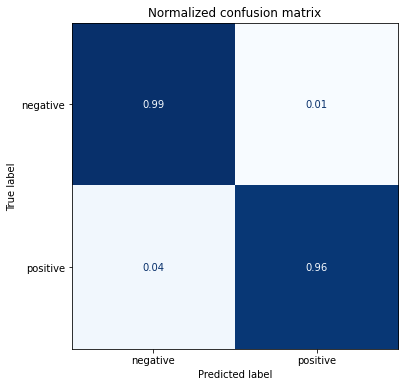

In [87]:
plot_confusion_matrix(y_preds, y_valid, labels)

The previos performance analysis was based on the validation set, but we can conduct a more rigorous analysis using the testing set, as it is shown in the following cells:

In [88]:
preds_test_output = trainer.predict(emotions_test_encoded)

In [89]:
preds_test_output.metrics

{'test_loss': 0.0527891144156456,
 'test_accuracy': 0.9819027921406411,
 'test_f1': 0.9818899862160533,
 'test_runtime': 3.1237,
 'test_samples_per_second': 619.129,
 'test_steps_per_second': 9.924}

In [90]:
import numpy as np
y_test_preds = np.argmax(preds_test_output.predictions, axis=1)

In [91]:
#import numpy as np
y_test = np.array(emotions_test_encoded["label"])
labels = emotions_train_encoded.features["label"].names

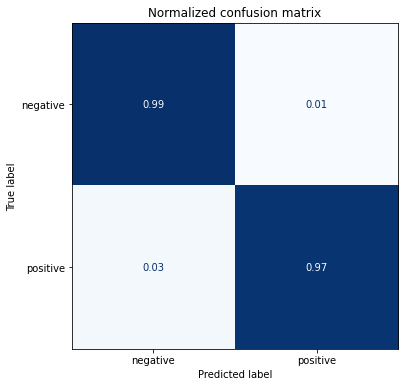

In [92]:
plot_confusion_matrix(y_test_preds, y_test, labels)

**Training using the augmented emotions dataset**

Now that we've already training DistillBERT on the original binary emotions dataset, we are going to apply again the training process, as well as the validation analysis, but now using the augmented emotions dataset.

In [93]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_train_encoded) // batch_size
model_name = f"{model_ckpt}-finetuned-augmented-emotions"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True, 
                                  log_level="error")

Once we have finished with the corresponding training set up, it is time to finally train DistillBERT.

In [94]:
from transformers import Trainer

trainer_augmented = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_train_augmented_encoded,
                  eval_dataset=emotions_validation_augmented_encoded,
                  tokenizer=tokenizer)
trainer_augmented.train();

Cloning https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-augmented-emotions into local empty directory.


Download file pytorch_model.bin:   0%|          | 8.00k/255M [00:00<?, ?B/s]

Download file runs/Mar02_23-54-34_e2fb85364d5b/events.out.tfevents.1677801313.e2fb85364d5b.1348.2: 100%|######…

Download file runs/Mar02_23-54-34_e2fb85364d5b/1677801313.3557725/events.out.tfevents.1677801313.e2fb85364d5b.…

Download file training_args.bin: 100%|##########| 3.50k/3.50k [00:00<?, ?B/s]

Clean file runs/Mar02_23-54-34_e2fb85364d5b/events.out.tfevents.1677801313.e2fb85364d5b.1348.2:  19%|#9       …

Clean file runs/Mar02_23-54-34_e2fb85364d5b/1677801313.3557725/events.out.tfevents.1677801313.e2fb85364d5b.134…

Clean file training_args.bin:  29%|##8       | 1.00k/3.50k [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/255M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.049900,0.048000,0.984571,0.984571
2,0.024000,0.054673,0.984089,0.984089


In [95]:
trainer_augmented.push_to_hub(commit_message="Training completed for a sentiment analysis task using data augmentation!")

Upload file pytorch_model.bin:   0%|          | 32.0k/255M [00:00<?, ?B/s]

Upload file runs/Mar06_23-17-01_acd06a0f7b0d/events.out.tfevents.1678144698.acd06a0f7b0d.174.2: 100%|#########…

remote: Scanning LFS files of refs/heads/main for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-augmented-emotions
   b3194b3..b999b95  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-augmented-emotions
   b3194b3..b999b95  main -> main

To https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-augmented-emotions
   b999b95..f087a14  main -> main

   b999b95..f087a14  main -> main



'https://huggingface.co/raul-af7/distilbert-base-uncased-finetuned-augmented-emotions/commit/b999b956586983b48494e41b2e8eebac5839022c'

In [96]:
preds_augmented_output = trainer_augmented.predict(emotions_validation_augmented_encoded)

In [97]:
preds_augmented_output.metrics

{'test_loss': 0.054672885686159134,
 'test_accuracy': 0.9840887174541948,
 'test_f1': 0.9840885361997309,
 'test_runtime': 3.7351,
 'test_samples_per_second': 555.276,
 'test_steps_per_second': 8.835}

In [98]:
import numpy as np
y_augmented_preds = np.argmax(preds_augmented_output.predictions, axis=1)

In [99]:
#import numpy as np
y_augmented_valid = np.array(emotions_validation_augmented_encoded["label"])
labels = emotions_train_encoded.features["label"].names

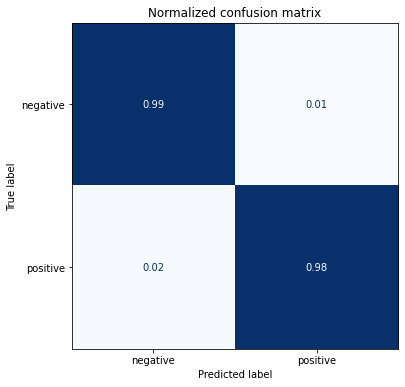

In [100]:
plot_confusion_matrix(y_augmented_preds, y_augmented_valid, labels)

Now let's check the performance on the binary test dataset.

In [101]:
preds_test_output = trainer_augmented.predict(emotions_test_encoded)

In [102]:
preds_test_output.metrics

{'test_loss': 0.04371359944343567,
 'test_accuracy': 0.9891416752843847,
 'test_f1': 0.9891449255620649,
 'test_runtime': 3.5402,
 'test_samples_per_second': 546.294,
 'test_steps_per_second': 8.757}

In [103]:
import numpy as np
y_test_preds = np.argmax(preds_test_output.predictions, axis=1)

In [104]:
#import numpy as np
y_test = np.array(emotions_test_encoded["label"])
labels = emotions_train_encoded.features["label"].names

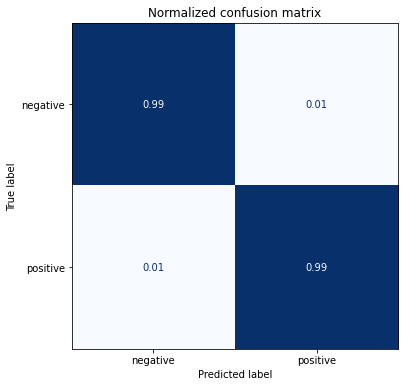

In [105]:
plot_confusion_matrix(y_test_preds, y_test, labels)

The evaluation process shows how we achieved a slightly improvement when we trained DistillBERT with the augmented dataset, althought we applied a very simple augmentation technique, in this case, the EmbeddingAugmenter() approach from the TextAttack library. <br>
Another important contribution of this project is that all the operations have been performed from scratch, from the creation of a binary dataset based on the emotion dataset, to the implementation of the augmentation process, have been performed from scratch. In this way, the machine learning practitioner can have a complete control on how the data is transformed and prepared to feed a Large Language Model for the task of sentiment analysis.